# Week12b - 12주차 머신러닝 실습

### DecisionTree Classification – entropy 설정

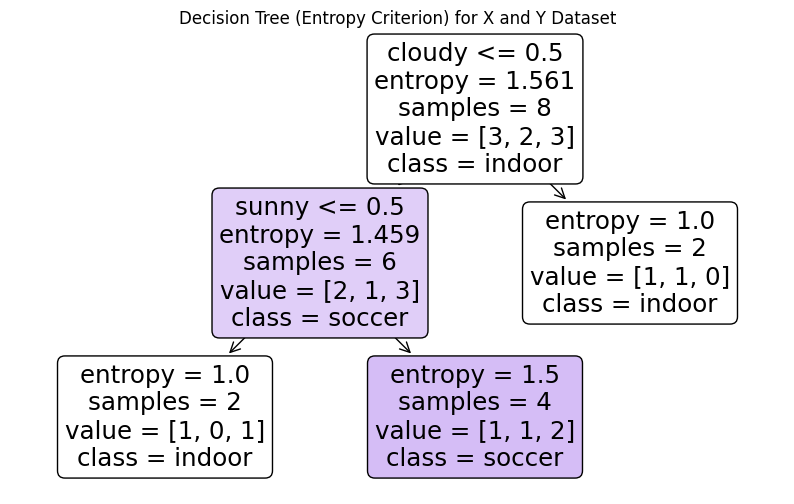

In [8]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
data = {
'Y': ['sunny', 'rain', 'sunny', 'cloudy', 'sunny', 'rain', 'cloudy', 'sunny'],
'X': ['soccer', 'indoor', 'movie', 'movie', 'soccer', 'soccer', 'indoor', 'indoor']
}
df = pd.DataFrame(data)

# 특성과 레이블로 변환
X = pd.get_dummies (df['Y']) # weather
Y = df['X'] # activity

# 모델 학습
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, Y)

# 의사결정트리 시각화
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=list(X.columns),
class_names=list(clf.classes_), filled=True, rounded=True)
plt.title("Decision Tree (Entropy Criterion) for X and Y Dataset")
plt.show()

### DecisionTree Classification – gini 설정

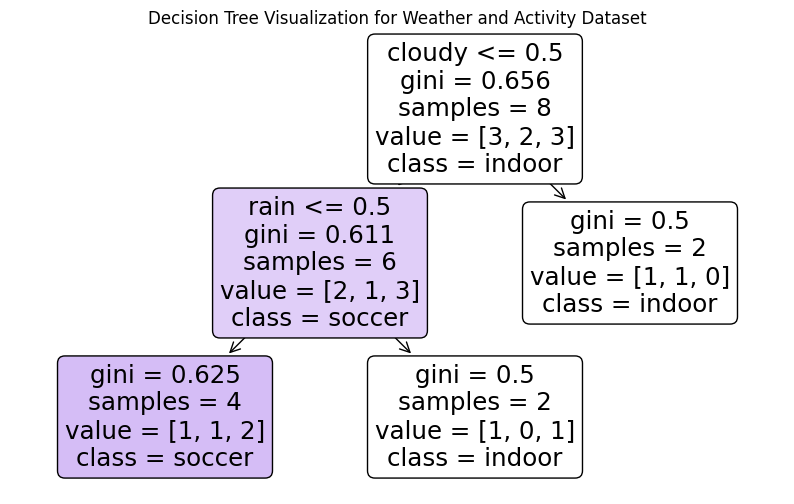

In [9]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#데이터셋 생성
data = {
'Y': ['sunny', 'rain', 'sunny', 'cloudy', 'sunny', 'rain', 'cloudy', 'sunny'],
'X': ['soccer', 'indoor', 'movie', 'movie', 'soccer', 'soccer', 'indoor', 'indoor']
}
df = pd.DataFrame(data)

#특성과 레이블로 변환
X = pd.get_dummies (df['Y']) # weather
Y = df['X'] # activity

#모델 학습
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(X, Y)

#의사결정나무 시각화
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=list(X.columns), class_names=list(clf.classes_), filled=True, rounded=True)
plt.title("Decision Tree Visualization for Weather and Activity Dataset") 
plt.show()

### DecisionTreeRegressor

Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0


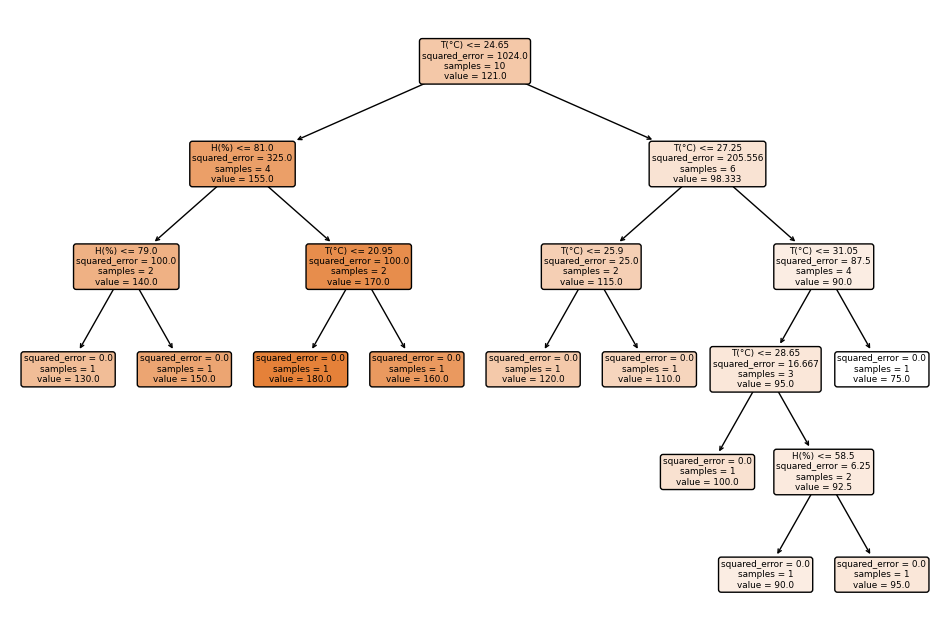

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'T(°C)': [25.3, 30.1, 22.5, 28.0, 20.2, 32.0, 26.5, 24.0, 29.3, 21.7], 
    'H(%)': [65, 55, 80, 70, 85, 60, 72, 78, 62, 82],
    'Play(min)': [120, 90, 150, 100, 180, 75, 110, 130, 95, 160]
}

df = pd.DataFrame(data)
X = df[['T(°C)', 'H(%)']]
Y = df['Play(min)']

regressor = DecisionTreeRegressor(criterion="squared_error", random_state=42)
regressor.fit(X, Y)

#예측
y_pred = regressor.predict(X)
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(12, 8))
plot_tree(regressor, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()

### DecisionTree Classifier

Mean Squared Error (MSE): 0.0
R-squared (R2): 1.0


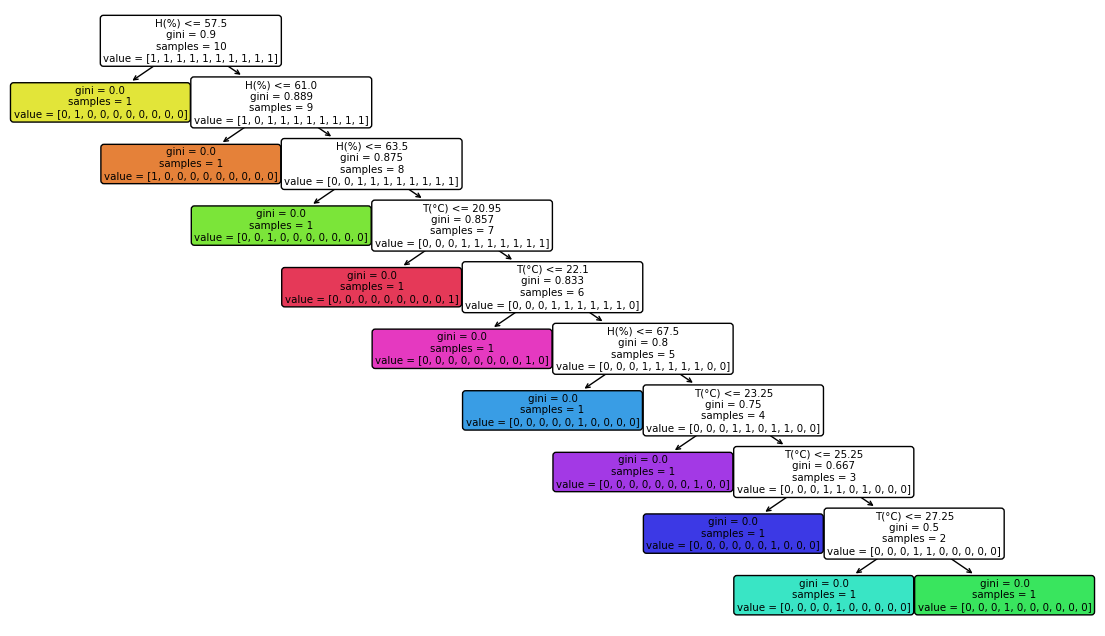

In [ ]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'T(°C)': [25.3, 30.1, 22.5, 28.0, 20.2, 32.0, 26.5, 24.0, 29.3, 21.7], 
    'H(%)': [65, 55, 80, 70, 85, 60, 72, 78, 62, 82],
    'Play(min)': [120, 90, 150, 100, 180, 75, 110, 130, 95, 160]
}

df = pd.DataFrame(data)
X = df[['T(°C)', 'H(%)']]
Y = df['Play(min)']

clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, Y)

#예측
y_pred = clf.predict(X)
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

plt.figure(figsize=(14, 8))
plot_tree(clf, feature_names=list(X.columns), filled=True, rounded=True)
plt.show()

# 질문

### 신용카드 발급사기 판단

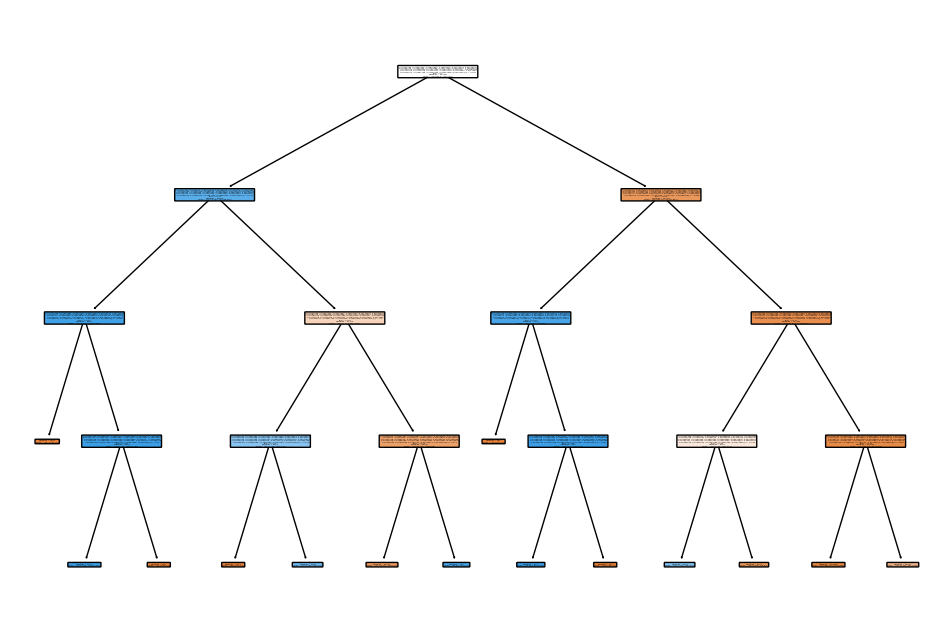

|--- Feature_13 <= -0.05
|   |--- Feature_11 <= -0.02
|   |   |--- Feature_3 <= -0.01
|   |   |   |--- class: 0.0
|   |   |--- Feature_3 >  -0.01
|   |   |   |--- Feature_0 <= 0.04
|   |   |   |   |--- class: 1.0
|   |   |   |--- Feature_0 >  0.04
|   |   |   |   |--- class: 0.0
|   |--- Feature_11 >  -0.02
|   |   |--- Feature_13 <= -0.10
|   |   |   |--- Feature_27 <= -0.00
|   |   |   |   |--- class: 0.0
|   |   |   |--- Feature_27 >  -0.00
|   |   |   |   |--- class: 1.0
|   |   |--- Feature_13 >  -0.10
|   |   |   |--- Feature_22 <= 0.08
|   |   |   |   |--- class: 0.0
|   |   |   |--- Feature_22 >  0.08
|   |   |   |   |--- class: 1.0
|--- Feature_13 >  -0.05
|   |--- Feature_6 <= -0.08
|   |   |--- Feature_3 <= 0.01
|   |   |   |--- class: 0.0
|   |   |--- Feature_3 >  0.01
|   |   |   |--- Feature_2 <= 0.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- Feature_2 >  0.00
|   |   |   |   |--- class: 0.0
|   |--- Feature_6 >  -0.08
|   |   |--- Feature_19 <= -0.04
|   |   |   |

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight 
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings('ignore')

card_data = pd.read_csv(r'./creditcard.csv')
card_data.head()

card_data.iloc[:,1:30] = StandardScaler().fit_transform(card_data.iloc[:,1:30])
data_matrix = card_data.values
X = data_matrix[:,1:30]
Y = data_matrix[:,30] #정상, 비정상1

X = normalize(X, norm='l1') # L1 norm
w_train = compute_sample_weight('balanced', Y)
# 클래스별로 샘플 수를 기반으로 가중치 부여 - 샘플 수가 적은 클래스에 가중치 부여

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, Y, sample_weight=w_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=list(X), filled=True, rounded=True)
plt.show()

from sklearn.tree import export_text
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
tree_text = export_text(clf, feature_names=feature_names)
print(tree_text)